# Final Project
### Halina Vercessi-Clarke and Hannah Nguyen

In [4]:
# Imports

In [1]:
import os 
import cv2
import numpy as np
from skimage import io
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pathlib
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from keras.utils import np_utils 

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

from data.data_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [3]:
np.random.seed(0)

In [6]:
file_path = os.getcwd() + '\imageDataFinal'
data = [] 
labels = []
i = 0
label_names = os.listdir(file_path)
class_names = []

for root, dirs, files in os.walk(file_path):
    path = str(root).replace(str(chr(92)), "/")
    go = False
    if 'fashion' in path:
        go = True
    if (path.split("/")[-1]!='imageDataFinal') and (go == True):
        class_names.append([label_names[i].split(" ")[0]])
        for img in os.listdir(path):
            pic = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            thresh = 128
            img_binary = cv2.threshold(pic, thresh, 255, cv2.THRESH_BINARY)[1]
            img = cv2.resize(img_binary,(80,80))
            data.append(img)
            labels.append([i])
        i+=1


In [7]:
print("Number of classes: ", len(class_names))

Number of classes:  20


In [8]:
data = np.asarray(data)
labels = np.asarray(labels)

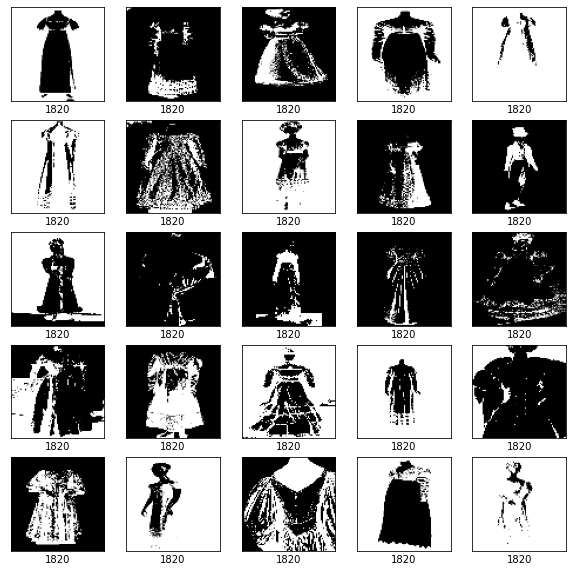

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(labels[i][0])][0])
    
plt.show()

In [71]:
# Function to split data into train, test, validation sets and normalize image data
def split_data(X, y):
    
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)
    xvalid, xtest, yvalid, ytest = train_test_split(xtest, ytest, test_size=0.5, random_state=0)
    
    
    # Normalize image data
    xtrain = np.asarray(xtrain / 255.0)
    xtest = np.asarray(xtest / 255.0)
    xvalid = np.asarray(xvalid / 255.0)
    
    return xtrain, xvalid, xtest, ytrain, yvalid, ytest

In [72]:
train_images, val_images, test_images, train_labels, val_labels, test_labels = split_data(data, labels)

In [73]:
# Convert numeric indexes to 1-hot vector length 10
ytrain_1hot = np_utils.to_categorical(train_labels)
val_labels1hot = np_utils.to_categorical(val_labels)
test_labels1hot = np_utils.to_categorical(test_labels)

In [23]:
train_images.shape

(714, 80, 80)

In [24]:
test_images.shape

(154, 80, 80)

In [25]:
val_images.shape

(153, 80, 80)

In [202]:
model1 = tf.keras.Sequential([
    layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(80,80,1)), 
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, (5, 5), activation='relu'), 
    layers.MaxPooling2D((2, 2)), 
    layers.Flatten(), 
    layers.Dense(500, activation='relu'), 
    layers.Dropout(0.5), 
    layers.Dense(200, activation='relu'), 
    layers.Dropout(0.5), 
    layers.Dense(81, activation='relu'), 
    layers.Dense(20, activation='softmax')
])


In [209]:
model2 = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), strides=(2, 2), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(80,80,1)),
    layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(20, activation='softmax')
])

In [204]:
model1.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [210]:
model2.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [215]:
print("MODEL 1\n")
print(model1.summary())

MODEL 1

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 38, 38, 32)        832       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 64)        51264     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 500)               1568500   
_________________________________________________________________
dropout_12 (Dropout)         (None, 500)    

In [216]:
print("MODEL 2\n")
print(model2.summary())

MODEL 2

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 39, 39, 32)        320       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 20736)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 100)               2073700   
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 20)     

In [208]:
hist_model1 = model1.fit(train_images, train_labels1hot, validation_data=(val_images, val_labels1hot), batch_size=16, epochs=50, shuffle=True, verbose=0)

In [213]:
hist_model2 = model2.fit(train_images, train_labels1hot, validation_data=(val_images, val_labels1hot), batch_size=16, epochs=50, shuffle=True, verbose=0)

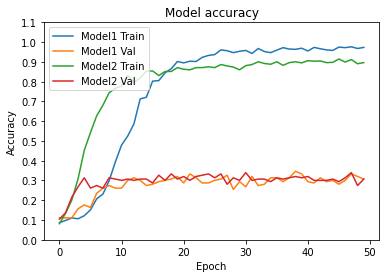

In [214]:
#Visualize the models accuracy
plt.plot(hist_model1.history['accuracy'])
plt.plot(hist_model1.history['val_accuracy'])
plt.plot(hist_model2.history['accuracy'])
plt.plot(hist_model2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.yticks(np.arange(0, 1.2, .1))
plt.legend(['Model1 Train', 'Model1 Val', 'Model2 Train', 'Model2 Val'], loc='upper left')
plt.show()

In [ ]:
# Predictions on unseen images

In [64]:
probability_model1 = tf.keras.Sequential([model1, tf.keras.layers.Softmax()])
predictions_model1 = probability_model1.predict(test_images)

[0.04604422 0.1251606  0.04604417 0.04604419 0.04604417 0.04604417
 0.04604417 0.04604417 0.04604417 0.04604423 0.04604417 0.04604417
 0.04604417 0.04604417 0.04604417 0.04604417 0.04604417 0.04604417
 0.04604417 0.04604419]
1
1830


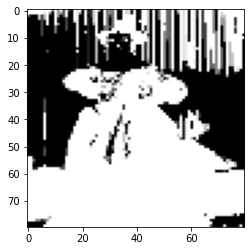

In [65]:
plt.imshow(test_images[3], cmap=plt.cm.binary)
print(predictions_model1[3])
print(np.argmax(predictions_model1[3]))
print(class_names[np.argmax(predictions_model1[3])][0])

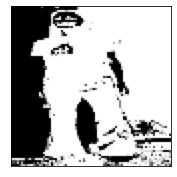

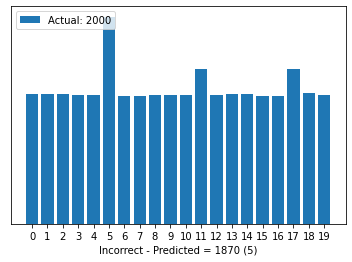

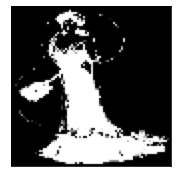

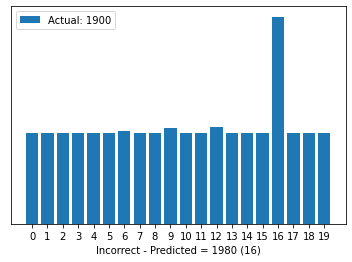

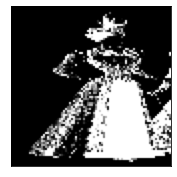

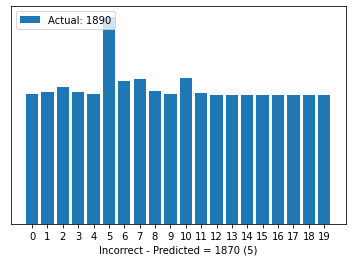

In [150]:

for i in range(140, 143):
    plt.figure(figsize=(10, 10))
    plt.subplot(3,3,(143-i))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.show()
    plt.bar(range(20), predictions_model1[i])
    plt.legend(['Actual: '+ class_names[int(test_labels[i][0])][0]], loc='upper left')
    plt.xticks(range(20))
    if (class_names[int(test_labels[i][0])][0] == class_names[np.argmax(predictions_model1[i])][0]):
        display = "Correct"
    else:
        display = "Incorrect - Predicted = "+class_names[np.argmax(predictions_model1[i])][0]+" ("+str(np.argmax(predictions_model1[i]))+")"
    plt.xlabel(display)
    plt.yticks([])
    
    plt.show()


In [177]:
file_path2 = os.getcwd() + '\prediction_Images2020'
data_2020 = [] 
labels_2020 = []
i = 0
label_names_2020 = os.listdir(file_path2)
classes_2020 = []

for root, dirs, files in os.walk(file_path2):
    path = str(root).replace(str(chr(92)), "/")
    go = False
    if '2020' in path:
        go = True
    if (path.split("/")[-1]!='prediction_Images2020') and (go == True):

        classes_2020.append([label_names_2020[i]])
        for img in os.listdir(path):
            pic = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            thresh = 128
            img_binary = cv2.threshold(pic, thresh, 255, cv2.THRESH_BINARY)[1]
            img = cv2.resize(img_binary,(80,80))
            
            data_2020.append(img)

            labels_2020.append([i])
        i+=1


In [178]:
data_2020 = np.asarray(data_2020)
data_2020_norm = np.asarray(data_2020/255.0)
labels_2020 = np.asarray(labels)

In [179]:
predictions_model_2020 = probability_model1.predict(data_2020_norm)

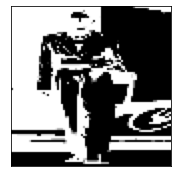

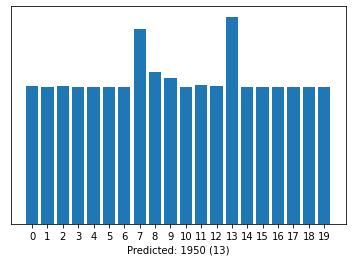

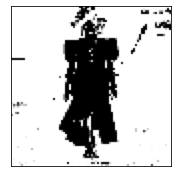

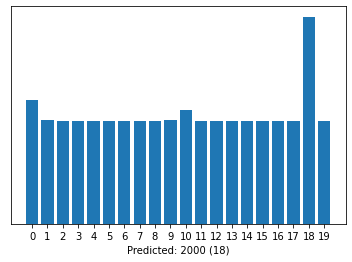

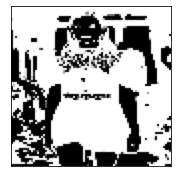

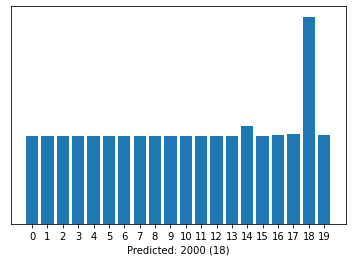

In [191]:
for i in range(29, 32):
    plt.figure(figsize=(10, 10))
    plt.subplot(3,3,(32-i))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data_2020_norm[i], cmap=plt.cm.binary)
    plt.show()
    plt.bar(range(20), predictions_model_2020[i])
    plt.xticks(range(20))
    plt.xlabel("Predicted: "+class_names[np.argmax(predictions_model_2020[i])][0]+" ("+str(np.argmax(predictions_model_2020[i]))+")")
    plt.yticks([])
    
    plt.show()

In [108]:
# OLD WORK
# PCA Model using SVC

In [ ]:
train_images.flatten()
test_images.flatten()

In [61]:
# Preprocess all images in data array
def vectorize_images(images):
    img_array = []
    for img in images:
        #img = np.asmatrix(img)
        img = img.flatten()/255.0
        img_array.append(img)
    
    return img_array

images_vectorized = vectorize_images(data)

In [62]:
print(images_vectorized)

[array([1., 1., 1., ..., 0., 0., 0.]), array([1.        , 1.        , 1.        , ..., 0.82745098, 0.18823529,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 1., 1., 1.]), array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]), array([0., 0., 0., ..., 1., 1., 1.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]), array([1., 1., 1., ..., 0., 0., 0.]), array([0., 0., 0., ..., 1., 1., 1.]), array([1., 1., 1., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]), array([1., 1., 1., ..., 1., 1., 1.]), array([1., 1., 1., ..., 0., 0., 0.]), array([0., 0., 0., ..., 1., 1., 1.]), array([1., 1., 1., ..., 1., 1., 1.]), array([0., 0., 0., ..., 1., 1., 1.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 

In [63]:
# Find best parameters combination for SVC model using bruteforce method
def SVC_model(X, y):
    svc_model = SVC()
    
    parameter_options = {'C':[1,10,100],'gamma':[0.001,0.005,0.01]}
    clf = GridSearchCV(svc_model, parameter_options, n_jobs=-1, cv=2)
    
    # Search for the best parameters
    clf.fit(X, y)
    return clf.best_estimator_

In [64]:
def PCA_Accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # Reduce to 16 components
    pca_model = PCA(n_components = 16)
    pca_model.fit(X_train)
    reduced_X_train = pca_model.transform(X_train)
    reduced_X_test = pca_model.transform(X_test)
    
    svc_model = SVC_model(reduced_X_train, y_train)
    pred = svc_model.predict(reduced_X_test)
    
    return np.asarray([svc_model, accuracy_score(y_test, pred)])

In [65]:
labels_1hot = np_utils.to_categorical(labels)
print(labels_1hot[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


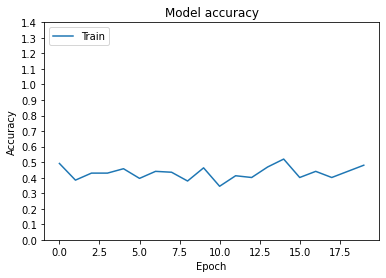

In [69]:
labels_1D = labels.flatten()

scores = []
for i in range(20):
    accuracy_score_images = PCA_Accuracy(images_vectorized, labels_1D)
    scores.append(accuracy_score_images[1])
plt.plot(scores)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.yticks(np.arange(0, 1.5, .1))
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
